<a href="https://colab.research.google.com/github/eshaandinesh/Colab/blob/main/Flower_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=e1a37e2c7d0c4af16fa3b4685d42cb0a603496cb7cd66730f05e742cb1c2382c
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.image import ImageSchema
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Initialize Spark session
spark = SparkSession.builder.appName("FlowerClassification").getOrCreate()

# Load Flower dataset
flower_df = ImageSchema.readImages("path/to/flower_dataset_folder").withColumn("label", Vectors.lit(0))

# Preprocess the dataset (resize, normalize, etc.)
# ...

# Display the first few rows of the dataset
flower_df.show(5)


In [ ]:
# Perform train-test split
train_df, test_df = flower_df.randomSplit([0.8, 0.2], seed=42)

# Display the number of samples in each split
print("Training set size:", train_df.count())
print("Testing set size:", test_df.count())


In [ ]:
# Define the model
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Create a feature vector assembler
assembler = VectorAssembler(inputCols=["<feature_columns>"], outputCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[assembler, lr])

# Train the model
model = pipeline.fit(train_df)

# Make predictions on the test set
predictions = model.transform(test_df)

# Display the predictions
predictions.show(5)


In [ ]:
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy:", accuracy)


In [ ]:
# Load blurred flower images
blurred_df = ImageSchema.readImages("path/to/blurred_flower_images").withColumn("label", Vectors.lit(0))

# Preprocess the blurred images
# ...

# Make predictions on the blurred images
blurred_predictions = model.transform(blurred_df)

# Display the predictions on blurred images
blurred_predictions.show(5)


NameError: ignored

In [ ]:
# Install tensorflow_datasets
!pip install tensorflow_datasets

# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# Load the TF Flowers dataset
dataset, info = tfds.load('tf_flowers', split='train', with_info=True)

# Display dataset info
print(info)

# Access the dataset
flowers_dataset = dataset

# Split the dataset into training and validation sets
num_samples = info.splits['train'].num_examples
train_size = int(0.8 * num_samples)

train_dataset = flowers_dataset.take(train_size)
validation_dataset = flowers_dataset.skip(train_size)

# Print a few examples from the training set
for example in train_dataset.take(5):
    image, label = example['image'], example['label']
    # Perform any necessary preprocessing or visualization here
    print(f"Label: {label.numpy()}, Shape: {image.shape}")


tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/root/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)
Label: 2, Shape: (333, 500, 3)
Label: 3, Shape: (212, 320, 3)
Label: 3, Shape: (240, 320, 3)
Label: 4, Shape:

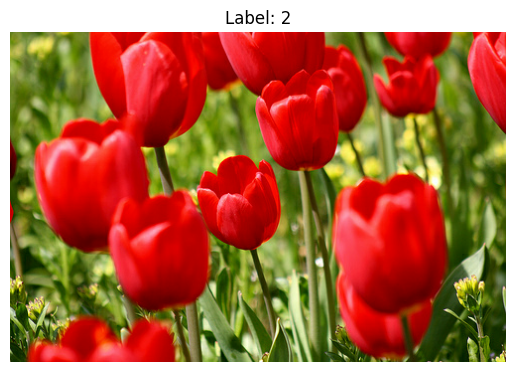

In [ ]:
import matplotlib.pyplot as plt

# Display an example image from the training set
for example in train_dataset.take(1):
    image, label = example['image'], example['label']
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
    plt.show()


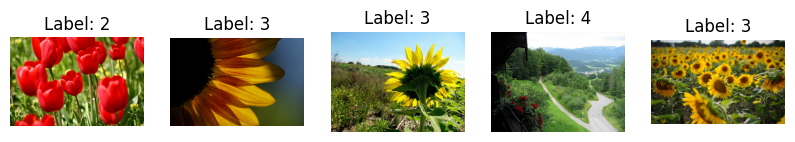

In [ ]:
import matplotlib.pyplot as plt

# Function to show images from the dataset
def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for i, example in enumerate(dataset.take(num_images)):
        image, label = example['image'], example['label']
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')
    plt.show()

# Show a few images from the training set
show_images(train_dataset, num_images=5)
